<a href="https://colab.research.google.com/github/alikaiser12/AI/blob/main/RNN_anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this example, we will use a vanilla RNN to detect anomalies in a time-series signal (e.g., a sound wave). The idea is to build an RNN model that can learn the normal patterns of a signal and identify any deviations (anomalies) from those patterns.

# Steps for Anomaly Detection with Vanilla RNN:

Generate or load the time-series data (signal with anomalies).

Preprocess the data (normalize, reshape, create sliding windows).

Build a simple RNN model to detect normal vs anomalous behavior.

Train the model and then predict the anomalies.

Visualize the results to see the detected anomalies.

# Step 1: Generate Time-Series Data with Anomalies

In this case, we will generate synthetic time-series data consisting of a normal signal (a sine wave) and inject an anomaly (a high-pitch signal or spike).





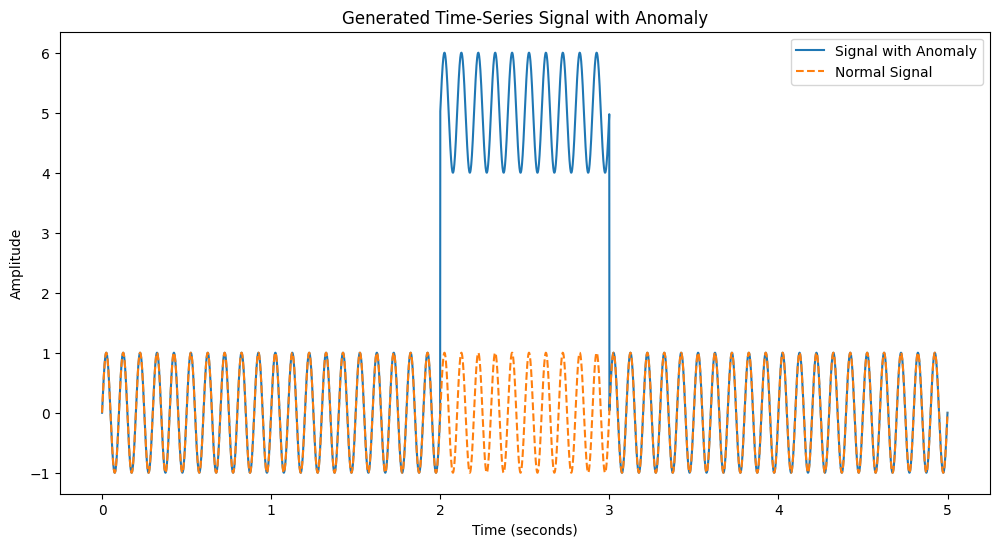

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate normal time-series signal (sine wave)
sampling_rate = 1000  # Sampling rate in Hz (samples per second)
t = np.linspace(0, 5, sampling_rate * 5)  # Time from 0 to 5 seconds
normal_signal = np.sin(2 * np.pi * 10 * t)  # 10 Hz sine wave (normal signal)

# Generate an anomaly (high-pitch spike signal)
anomaly_duration = 1  # Duration of the anomaly in seconds
anomaly_start = 2  # Time at which anomaly starts
anomaly_signal = np.zeros_like(t)
anomaly_signal[int(anomaly_start * sampling_rate):int((anomaly_start + anomaly_duration) * sampling_rate)] = 5  # High spike

# Combine the normal signal and anomaly signal
signal_with_anomaly = normal_signal.copy()
signal_with_anomaly += anomaly_signal  # Inject anomaly into the normal signal

# Plot the generated signal with anomaly
plt.figure(figsize=(12, 6))
plt.plot(t, signal_with_anomaly, label="Signal with Anomaly")
plt.plot(t, normal_signal, label="Normal Signal", linestyle='--')
plt.legend()
plt.title("Generated Time-Series Signal with Anomaly")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


Explanation:
Normal Signal: A 10 Hz sine wave representing the normal sound or signal.

# Anomaly:

 A high-pitch spike signal injected into the normal signal at a random time point.

Signal with Anomaly: This is the combination of the normal signal and the anomalous spike.

# Step 2: Preprocess the Data
We will normalize the signal and prepare it for the RNN by using sliding windows. This step is essential because RNNs process data sequentially.

In [2]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the signal to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
signal_normalized = scaler.fit_transform(signal_with_anomaly.reshape(-1, 1))

# Create sliding windows (sequences) from the time-series data
def create_dataset(data, window_size=100):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])  # Next value prediction (anomaly detection)
    return np.array(X), np.array(y)

window_size = 100
X, y = create_dataset(signal_normalized, window_size=window_size)

# Reshape X to match RNN input shape (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))


# Explanation:
# Normalization:

 We use MinMaxScaler to scale the signal to the range [0, 1], which helps the model learn efficiently.

Sliding Window: We create input sequences (X) and corresponding target values (y) where each input sequence predicts the next value. This is a common practice in time-series anomaly detection tasks.

Reshape: The RNN expects the data in the shape (samples, timesteps, features), so we reshape the input data accordingly.

# Step 3: Build the RNN Model
We will now define the model using vanilla RNN layers for anomaly detection.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Build the RNN model
model = Sequential()

# Add the RNN layer with 64 units (neurons)
model.add(SimpleRNN(64, activation='relu', input_shape=(X.shape[1], 1)))

# Add a Dense layer to predict the next value (for anomaly detection)
model.add(Dense(1))

# Compile the model with Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

# Explanation:

SimpleRNN Layer: We use a vanilla RNN with 64 units and ReLU activation. This layer learns the sequential patterns in the data.

Dense Layer: The Dense layer outputs the predicted next value in the sequence (for anomaly detection).

Loss Function: We use mean squared error (MSE), which is commonly used for regression tasks like predicting the next value in a sequence.

# Step 4: Train the RNN Model

Now, we train the model on our data.

In [4]:
# Train the model
model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 7.4314e-04 - loss: 0.0343
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 4.5489e-05 - loss: 6.1232e-04
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 3.1773e-04 - loss: 4.4522e-04
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 4.9018e-04 - loss: 4.1527e-04
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0010 - loss: 3.1102e-04
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 3.9503e-04 - loss: 4.4292e-04
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 2.1507e-04 - loss: 2.9102e-04
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.9419e-04 - loss: 1.4688e-04
Epoch 9/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 5.8010e-04 - loss: 4.9783e-04
Epoch 10/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 4.5449e-04 - loss: 2.4158e-04
Epoch 11/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - a

# Explanation:

We train the model for 20 epochs using a batch size of 32. This will allow the model to learn the patterns in the time-series data.

# Step 5: Detect and Eliminate Anomalies

After training, we will use the model to predict the next values in the sequence and compare them to the true values. If the predicted value significantly deviates from the actual value, we classify it as an anomaly.

154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


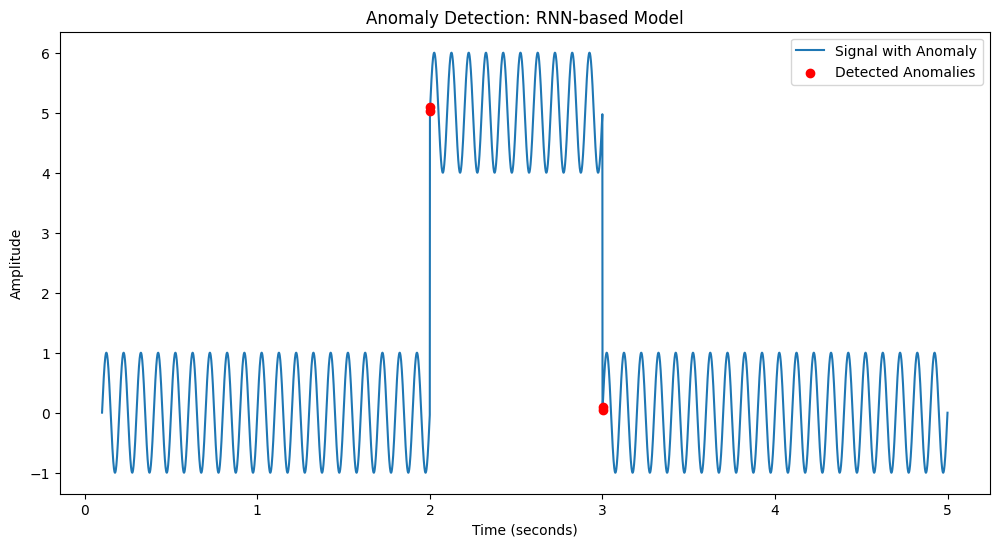

In [6]:
# Predict on the entire dataset
predictions = model.predict(X)

# Calculate the difference (error) between predicted and actual values
error = np.abs(predictions - y)

# Define a threshold for anomaly detection (e.g., 2 standard deviations from the mean)
threshold = np.mean(error) + 2 * np.std(error)

# Detect anomalies
anomalies = error > threshold

# Flatten the anomalies array to match the signal shape for plotting
anomalies_flat = anomalies.flatten()

# Plot the detected anomalies
plt.figure(figsize=(12, 6))
plt.plot(t[window_size:], signal_with_anomaly[window_size:], label="Signal with Anomaly")
plt.scatter(t[window_size:][anomalies_flat], signal_with_anomaly[window_size:][anomalies_flat], color='red', label="Detected Anomalies", zorder=5)
plt.legend()
plt.title("Anomaly Detection: RNN-based Model")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

# Explanation:

Predictions: The model predicts the next value in the sequence for each window.

Error Calculation: We compute the absolute error between the predicted and actual values.

Thresholding: We use a threshold of 2 standard deviations above the mean error to classify points as anomalies.

# Anomalies: The red dots on the plot represent the detected anomalies.

# Final Thoughts:

Vanilla RNNs are capable of detecting anomalies in time-series data like sound waves, though LSTMs generally work better for longer sequences.

The model works by learning normal patterns and identifying any deviations from these patterns as anomalies.

The threshold for anomaly detection is set using statistical methods (e.g., 2 standard deviations from the mean).